#  1. Importing Necessary Libraries

In [90]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2. Import data 

In [91]:
salary_data = pd.read_csv('Salary_Data.csv')
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## 3. Data Understanding 

### 3.1 Initial Analysis

In [92]:
salary_data.shape

(30, 2)

In [93]:
salary_data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [94]:
salary_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

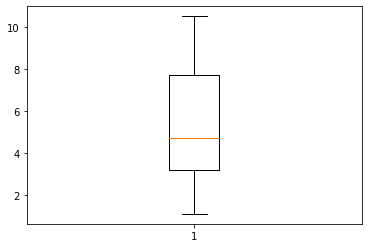

In [95]:
plt.boxplot(x = 'YearsExperience', data = salary_data)
plt.show()

### 3.2 Assumptions check

### 1. Linearity Test

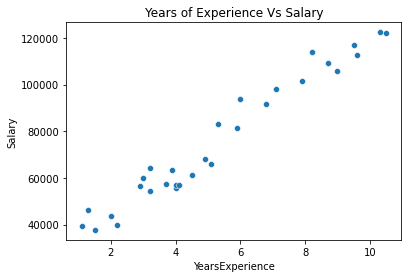

In [96]:
sns.scatterplot(x= 'YearsExperience', y = 'Salary', data = salary_data)
plt.title('Years of Experience Vs Salary')
plt.show()

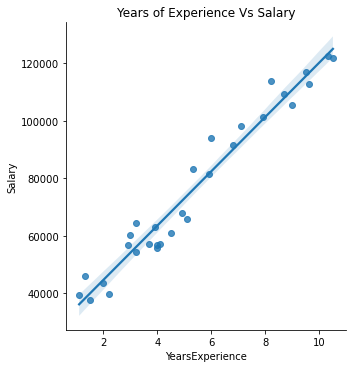

In [97]:
sns.lmplot(x= 'YearsExperience', y = 'Salary', data = salary_data)
plt.title('Years of Experience Vs Salary')
plt.show()

### 2. Normality test

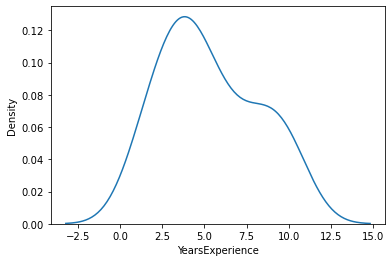

In [98]:
sns.distplot(a = salary_data['YearsExperience'], hist = False)
plt.show()

In [99]:
salary_data['YearsExperience'].skew()

0.37956024064804106

## 3. MultiCollinearity Check

### No dependent variable so no multicorealtion

## 4. No Autoregression

### There is no time based input feature

## 4. Data Preparation

### No data preperation all are as per requirement

# 5. Model Building | 6. Model training

In [100]:
import statsmodels.formula.api as smf

In [101]:
salary_model = smf.ols(formula = 'Salary ~ YearsExperience', data = salary_data).fit()
salary_model

In [102]:
salary_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

## 7. Model Testing

In [103]:
y_pred = salary_model.predict(salary_data)
y_pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [104]:
error = salary_data['Salary'] - y_pred
error

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

In [105]:
mean_error = error.mean()
mean_error

-7.275957614183426e-13

## 8. Model Evaluaton

In [106]:
print('R-square                           : ',round(salary_model.rsquared,4))
print('Adjusted R-square                  : ',round(salary_model.rsquared_adj,4))
print('Akaike information criterion (AIC) : ',round(salary_model.aic,4))
print('Bayesian information criterion(BIC): ',round(salary_model.bic,4))

R-square                           :  0.957
Adjusted R-square                  :  0.9554
Akaike information criterion (AIC) :  606.8823
Bayesian information criterion(BIC):  609.6847


## Homoscedasticity Check

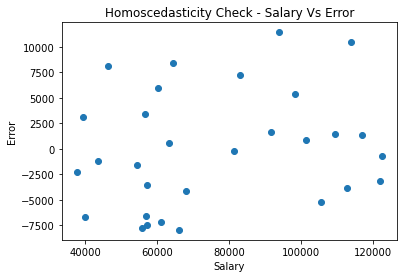

In [107]:
plt.scatter(x = salary_data['Salary'],y = error)
plt.title('Homoscedasticity Check - Salary Vs Error')
plt.xlabel('Salary')
plt.ylabel('Error')
plt.show()

###  Zero Residual Mean Test

It is a plot between **Actual Output Vs Predicted Plot**.

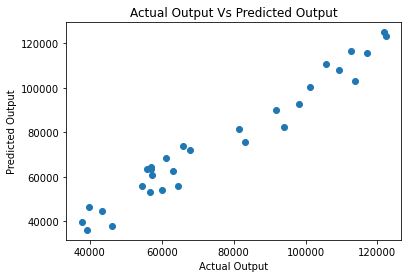

In [108]:
plt.scatter(x = salary_data['Salary'],y = y_pred)
plt.title('Actual Output Vs Predicted Output')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.show()

# 9. Model Deployment

In [109]:
from pickle import dump

In [110]:
dump(salary_model, open('salary_model.pkl','wb'))

In [111]:
from pickle import load

In [112]:
loaded_salary_pred = load(open('salary_model.pkl','rb'))

In [113]:
y_pred_new = loaded_salary_pred.predict(salary_data['YearsExperience'])
y_pred_new

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

# ==========================================================

# MinMaxScalar Transformation

In [114]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [115]:
X = salary_data[['YearsExperience']]
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [116]:
y = salary_data[['Salary']]
y

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


In [117]:
X.shape,y.shape

((30, 1), (30, 1))

In [118]:
transformed_salary_data = MinMaxScaler()
transformed_salary_data

MinMaxScaler()

In [119]:
transformed_salary_data = transformed_salary_data.fit_transform(X)

In [120]:
transformed_salary_data = pd.DataFrame(data=transformed_salary_data,columns=['YearsExperience'])
transformed_salary_data

,YearsExperience
0,0.000000
1,0.021277
2,0.042553
3,0.095745
4,0.117021
5,0.191489
6,0.202128
7,0.223404
8,0.223404
9,0.276596


In [121]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12)

# Model Training and Model Building

In [122]:
from sklearn.linear_model import LinearRegression

In [123]:
salary_model_2 = LinearRegression()
salary_model_2.fit(X,y)

LinearRegression()

In [124]:
salary_model_2.intercept_

array([25792.20019867])

In [125]:
salary_model_2.coef_

array([[9449.96232146]])

# Model testing

In [126]:
y_pred = salary_model_2.predict(X_train)
y_pred

array([[ 46582.11730587],
       [ 72097.0155738 ],
       [103281.8912346 ],
       [ 60757.06078805],
       [ 90051.94398456],
       [ 56032.07962732],
       [ 82491.9741274 ],
       [ 36187.15875227],
       [ 62647.05325234],
       [123126.81210966],
       [125016.80457395],
       [110841.86109176],
       [ 64537.04571663],
       [ 53197.09093089],
       [115566.84225249],
       [ 73987.00803809],
       [ 63592.04948449],
       [108006.87239533],
       [ 44692.12484158],
       [ 39967.14368085],
       [ 75877.00050238],
       [ 54142.08716303],
       [116511.83848464],
       [ 63592.04948449]])

In [127]:
error = y_train - y_pred
error

,Salary
4,-6691.117306
15,-4159.015574
23,10530.108765
9,-3568.060788
20,1686.056015
8,8412.920373
19,11448.025873
0,3155.841248
10,570.946748
28,-735.812110


In [128]:
mean_error = error.mean()
mean_error

Salary   -224.663558
dtype: float64

In [129]:
y_test_pred = salary_model_2.predict(X_test)
y_test_pred

array([[ 56032.07962732],
       [100446.90253816],
       [ 81546.97789525],
       [ 68317.03064522],
       [ 38077.15121656],
       [ 92886.932681  ]])

In [130]:
error = y_test - y_test_pred
error

,Salary
7,-1587.079627
22,855.097462
18,-183.977895
14,-7206.030645
1,8127.848783
21,5386.067319


In [131]:
mean_error = error.mean()
mean_error

Salary    898.654233
dtype: float64

# Model Deployment

In [132]:
from pickle import dump

In [133]:
dump(salary_model_2, open('salary_model_2.pkl','wb'))

In [134]:
from pickle import load

In [135]:
loaded_salary_pred = load(open('salary_model_2.pkl','rb'))

In [136]:
y_pred_new = loaded_salary_pred.predict(X_train)
y_pred_new

array([[ 46582.11730587],
       [ 72097.0155738 ],
       [103281.8912346 ],
       [ 60757.06078805],
       [ 90051.94398456],
       [ 56032.07962732],
       [ 82491.9741274 ],
       [ 36187.15875227],
       [ 62647.05325234],
       [123126.81210966],
       [125016.80457395],
       [110841.86109176],
       [ 64537.04571663],
       [ 53197.09093089],
       [115566.84225249],
       [ 73987.00803809],
       [ 63592.04948449],
       [108006.87239533],
       [ 44692.12484158],
       [ 39967.14368085],
       [ 75877.00050238],
       [ 54142.08716303],
       [116511.83848464],
       [ 63592.04948449]])